# Clustering and Regression

In this week's tutorial, we will be working through some examples of how we can use data mining techniques to derive deeper understanding of our data.

This week we will again be working with Python, using the Pandas library once more. We will, however, extend our knowledge to the [**`scikit-learn`**](http://scikit-learn.org/) data mining and machine learning library. This library offers lots of useful and fairly straight-forward tools for running data mining methods.

While we won't expect you to learn about every element of the data mining process, the intention is that you will be able to select and execute (using `scikit-learn`) an appropriate methodology for the in-depth analysis of your data. This tutorial will cover the use of **DBCSAN Clustering**, **K-Means Clustering**, **Affinity Propagation**, **Linear Regression**, and **Support Vector Regression** for data analysis. That sounds like a lot to cover in one workshop, but the methods used in `scikit` are quickly and easily applicable across different approaches. By using a range of approaches, you'll begin to get a sense of how they differ in terms of function and output.

Let's first import the basic libraries we will need. `Pandas` for data import and handling, `matplotlib` for graphing non-Pandas arrays, and `Numpy` for maths tools. **Run the script below to get started.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

### Data Interrogation

The dataset you will use this week relates to house prices in Boston, USA. This dataset was put together by researchers at Carnegie Mellon University in the late 1970s to investigate the relationship between house prices and air pollution. Along with data relating to these factors are a range of other data with potential influences on house prices - including crime rates, provision of teachers, distance from employment centres, average rooms per dwelling, and so on. Our analysis today will take us a little more widely beyond house prices and pollution, looking more generally at relationships between attributes across areas of Boston.

As with all new datasets, it is important that you consult the metadata before proceeding with the analysis. You can find the accompanying file in Moodle. **Before continuing make sure you are found answers to the following questions**:

1. What is the nature of each attribute (e.g. continuous, discrete, etc.)?
2. How many rows of data should you expect following the import?
3. What issues remain around incompleteness in the data?

You can download the dataset from Moodle. Prior to undertaking clustering and regression analyses, we need a basic understanding of our data and how the attributes in the dataset relate to each other. 

**Based on what you know from using Pandas over the last few weeks, import the Boston housing dataset as a Pandas dataframe (call it `boston`), inspect the data, calculate summary statistics on all attributes, and general simple plots of pairs of attributes.**

In [3]:
boston = pd.read_csv('boston.csv')
boston.head(12)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.0063,18.0000,2.3100,0,0.5380,6.5750,65.2000,4.0900,1,296,15.3000,396.9000,4.9800,24.0000
1,0.0273,0.0000,7.0700,0,0.4690,6.4210,78.9000,4.9671,2,242,17.8000,396.9000,9.1400,21.6000
2,0.0273,0.0000,7.0700,0,0.4690,7.1850,61.1000,4.9671,2,242,17.8000,392.8300,4.0300,34.7000
3,0.0324,0.0000,2.1800,0,0.4580,6.9980,45.8000,6.0622,3,222,18.7000,394.6300,2.9400,33.4000
4,0.0691,0.0000,2.1800,0,0.4580,7.1470,54.2000,6.0622,3,222,18.7000,396.9000,5.3300,36.2000
5,0.0299,0.0000,2.1800,0,0.4580,6.4300,58.7000,6.0622,3,222,18.7000,394.1200,5.2100,28.7000
6,0.0883,12.5000,7.8700,0,0.5240,6.0120,66.6000,5.5605,5,311,15.2000,395.6000,12.4300,22.9000
7,0.1446,12.5000,7.8700,0,0.5240,6.1720,96.1000,5.9505,5,311,15.2000,396.9000,19.1500,27.1000
8,0.2112,12.5000,7.8700,0,0.5240,5.6310,100.0000,6.0821,5,311,15.2000,386.6300,29.9300,16.5000
9,0.1700,12.5000,7.8700,0,0.5240,6.0040,85.9000,6.5921,5,311,15.2000,386.7100,17.1000,18.9000


You will see that, given the number of attributes involved, it is hard to get an overview of the major trends underlying the data. Nevertheless, this is something we need to get a grip of before we proceed to more sophisticated analyses - the trends we generate through clustering and regression may look interesting, but they could be misleading without us having a good underlying knowledge of the data.

There are two very useful ways by which these assessments can be done. The first is by *scatter matrix* - which draws scatter graphs for each pair of attributes, and disribution charts for each individual attribute (usually a histogram or KDE).

**Check out the code below - run it and see what you get. What can you discern from these results? Which attributes are strongly correlated with each other? **

**NOTE:** In this code we have assigned the plot to a new variable called `output`. This is to capture the text output that comes with generating a new chart (and is pretty lengthy when you're generating 196 charts at once). Remove the assignment to see the difference.

In [ ]:
# takes the dataset, an alpha value for opacity, a figure size setting, and a specification of the diagonal charts
output = pd.plotting.scatter_matrix(boston, alpha=0.2, figsize=(12, 12), diagonal='kde')

The second useful method for identifying dependency between attributes is to extract a correlation matrix. This method calculates the Pearson R statistic for each pair of attributes. 

**Run the very simple code below to extract correlations for this data. Do these results align with what you found above? Which pair of attributes has the strongest correlation?**

**NOTE**: You should be familiar with the concept of correlation of datasets, but if you're not then have a quick look at this page http://learntech.uwe.ac.uk/da/Default.aspx?pageid=1442

In [ ]:
boston.corr()

Hopefully you've now identified pairs of attributes which have high and low correlation - this will be important going forward as we construct clusters and regression models of relationships between attributes.

### Clustering

The first analysis we will undertake is some exploratory clustering of the data. Clustering draws together subsets of our data, revealing structure within our data points. It also helps tell us which attributes are more discrimininatory in differentiating between entries, and identify those which are not useful for taking forward to later analyses.

In this tutorial, we will work through the use of one clustering approach, and then you'll be expected to try out two more. The `scikit-learn` package makes production of multiple models very simple, so once you've run one model, the rest should be relatively straight forward. I'll provide some of the code, but some parts will draw on your prior work or require you to consult the documentation.

We'll start off with developing a DBSCAN clustering model. You'll recall from the lecture that DBSCAN is a density-based clustering method, which does not require the prior specification of the desired number of clusters. Instead clusters are built around the proximity of points, and as such, our job is to find the model parameters in terms of point density which best cluster our data.

The documentation for DBSCAN can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html), and it describes the input and expected outputs of the function.

First things first, **we always import the package we need**.

In [3]:
from sklearn.cluster import DBSCAN

Next we need to specify the data on which we are going to cluster. This work is exploratory, so we don't know what we're going to get back, or whether those clusters are meaningful. However, the process allows us to identify structure in data and association between attributes. 

So, we need to decide which data to use. Clustering can take any number of attributes, but for this first stage we'll just use two as they will allow us to easily visualise the clusters. Looking back at the scatter plot, the `NOX`-`MEDV` scatter plot indicates a high degree of spread across the data, and so could be a good initial basis for identifying clusters.

**Create a subset of the data containing just the `NOX` and `MEDV` attributes.**

There is an issue with this data in that the `MEDV` and `NOX` values are numerically very far apart. The higher variance in attributes with higher values means clusters are more likely to be influenced by these attributes than those with smaller value and variance.

So before moving onto the clustering stage, we need to standardise our new dataset. This scales our values to between 0 and 1, based on the mean and variance. We do this using the [`preprocessing.scale()`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function, as shown below. **Add in your dataset and run the function to create your scaled values. When complete, check out the resulting data.**

In [5]:
import sklearn.preprocessing as preprocessing
scaled = preprocessing.scale(boston) # add your dataframe name here

You'll see that the function has created a numpy array, rather than a Pandas dataframe. This isn't a problem, as our clustering method will take either, but is something to bare in mind. Now on to the clustering!

**IMPORTANT:** The `scikit-learn` package operates in a very similar fashion, regardless of the approach you are using. It uses the `.fit()` function execute the model and return results. Each model will take different arguments, but the same essential approach is used every time.

So, let's run the DBSCAN clustering method. According to the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html), the model can take a number of parameters. From our knowledge of the approach, we know that the `eps` distance and `min_samples` group size attributes are fundamental in creating the clusters. I've suggested some values below, but we'll try amending those later.

**Make sure you understand the code below (you'll need to know it for later), then run it to create the DBSCAN clusters.**

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=10) # create DBSCAN cluster object

In [ ]:
dbscan.fit(scaled) # run the .fit() function on the scaled dataset

We now have our DBSCAN object created, we can extract the groups it has identified. We do this using the `.labels_` method. **Run the code below to create an array of group labels for our data.**

In [ ]:
dbscan_labels = dbscan.labels_

The next thing to do is measure the formation of the clusters. We can do this through a range of measures - described in detail here [here](http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation). Most of these, however, require a groundtruth relating to how a cluster should look (e.g. help us supervise the creation of the clusters. In this case we do not have this. 

The only measure that can help is the Silhouette Score, which calculates how close points are on average to points their clustered with, relative to points they are not clustered with.

The `scikit-learn` algorithm ([docs](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient)) for Silhouette Score simply takes the data and the generated labels. A score closer to one indicates strong clustering, negative scores indicate poor clustering.

**Run the code below to first load the library, then extract the Silhouette Score for the clusters created above.**

In [6]:
from sklearn import metrics

In [ ]:
metrics.silhouette_score(scaled, dbscan_labels)

Now we have a sense of the quality of our clusters, we can visually explore the clustering. **So let's add the labels data as a new column to the `NOX`-`MEDV` dataframe you created earlier.** The data order will have been maintained so the labels will align correctly with the data.

Now visualise the clusters and their variation with `NOX` and `MEDV`. **Use a `.plot()` function to create a scatter plot of the two variables, with points coloured by group value. If you manage it, try getting creative with the colormap.** More information on how to do that can be found [here](http://pandas.pydata.org/pandas-docs/stable/visualization.html).

So what do you think of the results? Do the clusters look useful or realistic? **To help you judge, it is worth playing with the DBSCAN model, try different parameter values and observe how the groups change.**

Once you have tested different parameter settings, next add in additional attributes. This will create clusters in multiple dimensions. You won't be able to visualise the results easily in a graph, but you can test the clustering again using the Silhouette Score.

**Add in attributes that you think will help create better house clusters, and then test the performance gain or loss using the Silhouette Score.**

### Other Clustering Methods

Now that you've mastered the DBSCAN model, time to experiment with some others. The process is nearly exactly the same, but the models needs careful parameterisation and therefore a knowledge of how these approaches differ. 

**Referring back the lecture notes and the `sci-kit` online [literature](http://scikit-learn.org/stable/modules/clustering.html#clustering), develop clusters using...**

1. K-Means
2. Affinity Propagation

**In using each approach, you should seek to understand...**

* The parameters you need to get each approach to work, and their impact on the resulting clusters.
* Differences in the resulting clusters generated through each approach.
* The time each approach takes to run, and its indication of computational complexity. For this stage, you should explore how to use the `time.time()` function to measure how long the `.fit()` function takes to complete.
* How the addition of further attributes affects the speed of cluster generation.

If you have time and are feeling brave, try running agglomerative clustering too. If you want to visualise the resulting dendrogram, then the code found [here](https://github.com/MatKallada/mathewapedia-learn/commit/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7) will help you do that.

### Linear Regression

Now that you have a bit more of grasp on the data, it's time to explore some of the relationships between attributes in the dataset. As you'll know, we can do this through regression.

Fortunately, because `scikit-learn` is so bloody marvellous, we don't actually need to learn much new syntax to get a model off the ground. As long as we have a decent understanding of the approach we are using, we can generate the models pretty quickly. We'll start with the simplest approach - Linear Regression - and advance from there.

**Before we start, check out the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) on the `scikit-learn` LR implementation.** Notice how a lot of the same methods seen in the DBSCAN documentation are seen again here.

With that in mind, let's **import the package we need**.

In [7]:
from sklearn.linear_model import LinearRegression

Now we'll set up our dataset. In this case we will try and predict the house price value shown in `MEDV`. We'll use one explanator variable to predict these prices (we'll try more in a minute). **From your earlier analysis pick one attribute which you think will be interesting to investigate, then create a subset of the data including those two attributes below.**

One thing to know about the linear regression is that it treats response (`y`) and explanator (`x`) data differently. The `scikit` function requires that we pass these data separately.

To organise our data into the right format we need to run a `numpy` `.reshape()` command. In doing so we need to specify for both the response and explanator data the number of points we're including (the length of the dataframe), and how long each entry is (1 attribute in this case). **We do this using the following commands - insert your variable names into the independent variable range.** We'll specify these as a `y` (our response variable) and `X` (our explanator variable).

In [ ]:
y = subset['MEDV'].values.reshape(len(subset['MEDV']), 1)

In [ ]:
X = subset[''].values.reshape(len(subset['']), 1) # add attribute names

Now the data is in order, we can run our Linear Regression function. Consulting the documentation, and knowing about Linear Regression, we can guess that we can get by without setting any of the optional parameters. **So let's first create the LinearRegression object, just like we did with DBSCAN.**

In [ ]:
lr = LinearRegression()

And just like earlier, we'll run the model on the data using the `.fit()` function. This time we pass it our X and y arrays. **Do this below (and make sure you get them the right way around!).**

Now that we've created our fit, it's time to look at the structure of the model and how well it fits the data.

There are a number of ways to do this. In the first instance, as with any linear regression model, we want to get a grip on the coefficients and intercept of the model. Helpfully, these two functions are built into the LinearRegression object. **Consult the documentation and see if you can find out how to extract these.**

We are also naturally interested to see how well the model performed - in this case how close our explanatory variables predict house prices. The typical approach to this is to calculate the R2 value, which again is a function provided by `scikit`.

The code below will generate the R2 score for us. **Run the code and see how well the model performed.** 

**NOTE:** In this case we have used the original data to test the fit, however, a more robust approach would have been to use a subset of the data to train and test the model. In which case, we would send the test dataset to the `.score()` function to test the fit.

In [ ]:
lr.score(X,y)

Finally, we would like to see the fit visualised, which we can do using a scatter plot. However, because we want to plot points and the line of best fit, we need to configure things slightly differently, pulling on some functionality provided in `matplotlib`. 

This process works by assigning plots to the `matplotlib` `plt` object (we defined this when we imported the library earlier). Below we first set the size of the figure area (using the `figsize` parameter, then we add a scatter graph of the original data, and then we plot a line between our indepedent variable (`x`) and the predictions of `y` made by the linear regression model. We also add axis labels and a legend (which uses the `label` parameter set in each plot). The final `plt.show()` command prompts `matplotlib` to show the combined plots. 

**Check through the code below and execute it to reveal the chart. Enter a label name for your independent variables. Try adjusting the parameters to change the look of the chart, referring to the [documentation](http://matplotlib.org/api/pyplot_summary.html) where needed.**

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='black', alpha=0.2, label='Real')
plt.plot(X, lr.predict(X), color='blue', label='LR')
plt.xlabel('')
plt.ylabel('MEDV')
plt.legend()
plt.show()

Well done on creating your first regression model using `scikit-learn`, pretty straightforward eh? 

**A couple of important points to consider - How does that fit look to you? Are you concerned about any skew in the points in the plot? What could you do to resolve this issue? In which way could you transform the data? Think about this and make any necessary adjustments to the data above.**

If you have time, try adding in more attributes to test the fit with the model. It won't be possible to visualise the fit beyond three dimensions, but the R2 value will provide an indication of model fit. You will need to adjust the `.reshape()` function to accept the number of attributes you intend to use (it is currently configured to take only 1).

### Support Vector Regression 

From what we have learnt so far it's pretty easy to extend these approaches to other modelling techniques. Let's quickly have a play around with Support Vector Regression.

SVR uses a highly adaptable kernel to model the shape of the relationship between dependent and independent variables. A kernel is a smooth surface which can effectively bend around the data, and therefore adapt better to non-linearities in the relationship between variables.

**Let's start by importing the package as below.**

In [8]:
from sklearn.svm import SVR

Now, as we've seen before, we first need to set up the model. For the purposes of this example, we'll choose an RBF `kernel` (others are available, and can be tested), set an error penalty term (`C`) which penalises poor model performance, and a `gamma` value to control the extent to which the line can adapt to the points.

In [ ]:
svr = SVR(kernel='rbf', C=100, gamma=100)

**Now fit the model to the data we used above.**

**Check the R2 score.**

As we have moved between dimensions, the shape of the fit created by SVR can look chaotic when drawn as a line. So this time we'll just draw the predicted distribution of points generated by the SVR, and compare it to the original data.

**Create a visualisation with two scatter plots overlaid, one of the real data (in black), one with the prediction (in red). Then try adding the predicted points from the linear regression model too (in green) and see how they compare. You should end up with something like that below.**

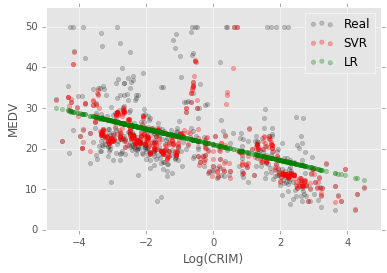

Now that you've seen how SVR can work, and observed its improvement on Linear Regression, **try running it with different parameters**, and get a sense of how they impact the quality of the prediction. Also check **how different settings affect the model run time**, as this will have a big impact when you move to bigger datasets.

You can **try different kernels too**, check out [this page](http://scikit-learn.org/stable/modules/svm.html) to learn more about the different options.

### Exercises

Well done for completing this tutorial on data mining. You will now have a stronger understanding of how to use data mining tools to gain insight into your datasets. The principles you have learnt here are applicable across many data mining methods, as is much of the `scikit` syntax.

If you have time and/or interest in exploring these tools further, then you might wan to try one or more of these activities:

1. We committed a methodological sin in reusing our calibration dataset for validation. But there are ways around this problem, either by using another dataset, or by splitting the dataset into parts for *cross-validation*. Look at the documentation on cross-validation here http://scikit-learn.org/stable/modules/cross_validation.html and then implement a simple technique to avoid this problem.
2. Logistic regression can be used to construct transport choice models, transforming transportation attributes into actual choices. Have a look at the example on the Biogeme website - http://biogeme.epfl.ch/examples_swissmetro.html - where survey data in Switzerland has been used to construct a model of mode choice. Either read about the project, or download the data, import it, and try constructing a model yourself.
3. There are lots of nice datasets for mining held on the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets.html). Take a look, and if any of them take your fancy try create a regression model. Which data features are important? Which are not? My favourite is the Wine dataset (https://archive.ics.uci.edu/ml/datasets/Wine), for obvious reasons.
4. There is an updated version of the Boston housing dataset available here - https://www.kaggle.com/c/house-prices-advanced-regression-techniques. It contains many more attributes, which would make for a more sophisticated, interesting, but more complicated analysis process.